In [93]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import glob
import cv2
import math
import scipy

plt.style.use("dark_background")

In [99]:
rnge = 750
dx=pd.read_csv(f"X.csv")

In [100]:
def moving_average(x, n=10, dim = 1) :
    ret = np.cumsum(x, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    add = dim-len(ret[n - 1:]) if len(ret[n - 1:]) < dim else 0
    ins = [0]*add
    fin = np.concatenate((np.array(ins),ret[n - 1:]),axis = None)
    return fin / n

In [101]:
def get_agg_density(data, rnge):
    My,Mx,D,total_size,percentage,bbox = [],[],[],[],[],[]
    for frame in tqdm(allf:=np.unique(data["frame"])):
        x = data["x"][(data["frame"]==frame)&(dx["image_index"]==1)]
        y = data["y"][(data["frame"]==frame)&(dx["image_index"]==1)]
        
        pts = list(zip(x,y))
        if len(pts) > 2:
            ch = scipy.spatial.ConvexHull(pts)
            area = cv2.contourArea(ch.simplices)
        else: area = 0

        
        min_x = min(x) if len(x)>0 else 0
        max_x = max(x) if len(x)>0 else 0
        avg_x = np.average(x) if len(x)>0 else 0
        
        min_y = min(y) if len(y)>0 else 0
        max_y = max(y) if len(y)>0 else 0
        avg_y = np.average(y) if len(y)>0 else 0
        
        
        Mx.append([min_x,max_x,avg_x])
        My.append([min_y,max_y,avg_y])
        
        b= (max_x-min_x)*(max_y-min_y)
        b_s = b/(rnge**2) if b > 0 else 0
        bbox.append(b_s)
        t_s = area / (rnge**2) if area > 0 else 0
        total_size.append(t_s)
        
        len_a = len(data[(data["frame"]==frame)&(dx["image_index"]==1)])
        density = len_a/area if len_a > 0  and area > 0 else 0
        D.append(density)
        
        percentage.append(len_a/50)
    return My,Mx, D,total_size,percentage,bbox,len(allf)

In [102]:
fin = get_agg_density(dx[["frame","x","y"]],rnge)

100%|███████████████████████████████████████████████████████████████████████████| 10001/10001 [01:18<00:00, 127.19it/s]


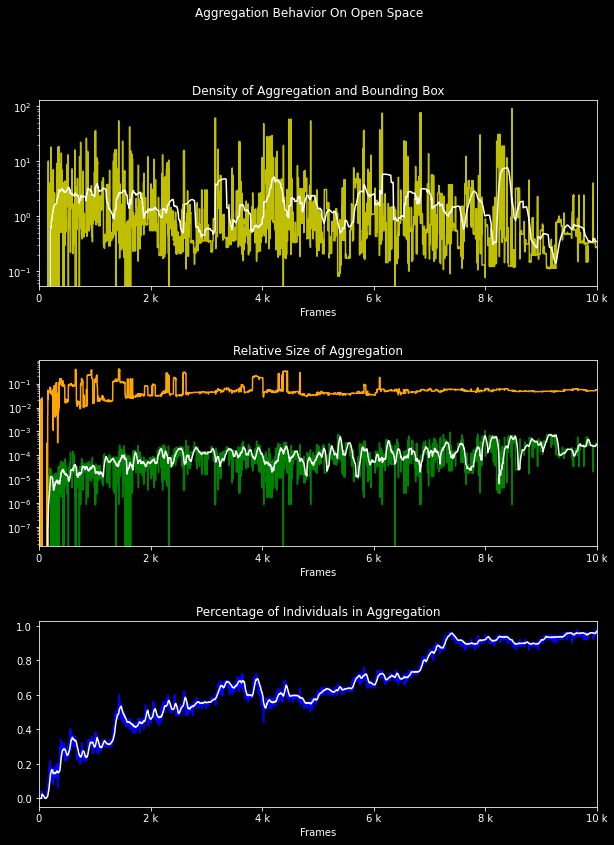

In [106]:
fig, ax = plt.subplots(3,figsize=(10,13))
fig.suptitle("Aggregation Behavior On Open Space")
plt.subplots_adjust(hspace = .4)



ax[0].plot(range(fin[-1]),fin[2],color = "y")#density
ax[0].plot(range(fin[-1]),moving_average(fin[2],n=200, dim=len(fin[2])),color = "w")#density

ax[1].plot(range(fin[-1]),fin[3],color = "g")#total size
ax[1].plot(range(fin[-1]),fin[5],color = "orange")
ax[1].plot(range(fin[-1]),moving_average(fin[3],n=50, dim=len(fin[3])),color = "w")#total size


ax[2].plot(range(fin[-1]),fin[4],color = "b")#percentaeg
ax[2].plot(range(fin[-1]),moving_average(fin[4],n=50, dim=len(fin[4])),color = "w")#percentaeg

ax[0].set_title("Density of Aggregation and Bounding Box")
ax[1].set_title("Relative Size of Aggregation")
ax[2].set_title("Percentage of Individuals in Aggregation")

ax[0].set_yscale('log')
ax[1].set_yscale('log')




for i in range(3):
    ax[i].xaxis.set_major_formatter(ticker.EngFormatter())
    ax[i].set_xlim((0,10000))
    ax[i].set_xlabel("Frames")




plt.savefig(f"plots/X.png",dpi=300, transparent = True)